<a href="https://colab.research.google.com/github/RodrigoCasanova/Backend/blob/main/FMY0100_Base_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2 - Entrega Parcial Caso Semestral (Modelos de regresión)

---



**Autores: José Paillán, Rodrigo Casanova, Samuel Acuña**

**Correo Electrónico:jos.paillan@duocuc.cl, rodr.casanova@duocuc.cl, sam.acuna@duocuc.cl**

**Fecha de Creación:** Octubre 2025

**Versión:** 1.0  



---

## Descripción
Este notebook corresponde al desarrollo de la entrega 12de la asignatura electiva de Fudnamentos de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.12. A continuación se listan las bibliotecas necesarias:

-
-

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
````

# Modelos solicitados

| Modelo                                                     | Variable dependiente (*y*, target) | Variables independientes (*X*, features)    |
| ----------------------------------------- | ---------------------------------- | ------------------------------------------------- |
| **Modelo 1: Predicción de supervivencia individual** | `TimeAlive` o `ScaledTimeAlive`    | `AvgCentroidDistance`, `TravelledDistance`, `AvgRoundVelocity`, `RoundStartingEquipmentValue`  |
| **Modelo 2: Eficiencia económica**                      | `RoundStartingEquipmentValue`      | `RoundKills`, `RoundAssists`, `RoundHeadshots`                                                |
| **Modelo 3: Estilo de movimiento**                   | `TravelledDistance`                | `TimeAlive`, `AvgRoundVelocity`                                                                 |

| Modelo                                                                                                          | Justificación                                                                             |
| ---------------------------------------------------------- | ---------------------------------- |
| **Modelo 1: Predicción de supervivencia individual** | Permite estimar si un jugador tiende a sobrevivir más según su movilidad y recursos       |
| **Modelo 2: Eficiencia económica**                      |  Mide cuánto equipamiento se asocia con éxito (kills, headshots)                           |
| **Modelo 3: Estilo de movimiento**                   | Analiza cómo la supervivencia y velocidad afectan la distancia recorrida                  |

## Lista de Cotejo

**Ponderación total: 100 puntos (equivale al 30% de la nota final de la asignatura)**  

| Nº | Criterio | Descripción del aspecto evaluado | Ponderación | Indicadores de logro | Penalizaciones |
|----|-----------|----------------------------------|--------------|----------------------|----------------|
| **1** | **Estructura general y formato (Notebook)** | Orden, claridad y cumplimiento de las fases 2–5 de CRISP-DM como secciones bien diferenciadas. Incluye títulos, subtítulos y redacción clara. | **10 pts** | ✅ Notebook bien estructurado con secciones numeradas.<br>✅ Claridad y coherencia.<br>✅ Imports al inicio del documento. | ❌ Falta de secciones o estructura desordenada (-3).<br>❌ Imports distribuidos o repetidos (-2).<br>❌ Mala organización o redacción (-5). |
| **2** | **Fase 2: Entendimiento de los datos** | Análisis descriptivo de las variables dependientes e independientes: distribución, correlación, outliers, tratamiento de variables categóricas agregadas. | **15 pts** | ✅ Análisis visual y estadístico adecuado.<br>✅ Identifica correlaciones relevantes.<br>✅ Describe correctamente las variables categóricas nuevas.<br>✅ Interpretaciones conectadas con el contexto del juego. | ❌ Análisis incompleto o superficial (-5).<br>❌ Sin interpretación o fuera de contexto (-5). |
| **3** | **Fase 3: Preparación de los datos** | Uso correcto de **pipelines** para tratamiento de datos numéricos y categóricos (imputación, escalado, codificación, etc.). | **20 pts** | ✅ Pipeline implementado correctamente.<br>✅ Incluye transformaciones acordes al tipo de variable.<br>✅ Integra las variables categóricas solicitadas.<br>✅ No hay pasos duplicados fuera del pipeline. | 🚨 **No uso de pipeline o uso incorrecto: -10 pts.**<br>❌ Preparación manual sin justificación (-5).<br>❌ No diferencia entre numéricas y categóricas (-5). |
| **4** | **Fase 4: Modelado (Entrenamiento)** | Implementación del modelo de regresión usando pipeline. Entrenamiento correcto de los tres modelos solicitados. | **20 pts** | ✅ Uso del pipeline para el flujo completo (preprocesamiento + modelo).<br>✅ Modelo adecuado al tipo de variable dependiente.<br>✅ Entrenamiento exitoso (fit correcto). | 🚨 **Creación del modelo fuera del pipeline: -10 pts.**<br>❌ Modelo incorrecto o sin entrenar (-5).<br>❌ Repite código sin modularización (-3). |
| **5** | **Fase 5: Evaluación del modelo** | Evaluación del desempeño con R², MAE y MSLE + interpretación en contexto del negocio. | **15 pts** | ✅ Calcula correctamente todas las métricas.<br>✅ Interpreta cada una en términos del negocio.<br>✅ Compara resultados entre modelos si aplica. | ❌ Falta alguna métrica (-5).<br>❌ Interpretación técnica sin conexión con el negocio (-5).<br>❌ Errores de cálculo o mal uso de métricas (-5). |
| **6** | **Predicción con datos aleatorios y su interpretación** | Genera entrada nueva (aleatoria o simulada), predice y explica el resultado en términos del negocio. | **10 pts** | ✅ Entrada creada con lógica (valores coherentes).<br>✅ Predicción ejecutada correctamente.<br>✅ Interpretación coherente con el modelo. | ❌ No incluye ejemplo de predicción (-5).<br>❌ Interpretación fuera de contexto (-3). |
| **7** | **Redacción, ortografía y presentación** | Calidad comunicativa del documento: ortografía, coherencia, estilo profesional. | **10 pts** | ✅ Texto sin faltas ortográficas.<br>✅ Redacción clara y formal.<br>✅ Explicaciones completas y coherentes. | ❌ Errores ortográficos reiterados (-3).<br>❌ Redacción confusa o poco profesional (-4).<br>❌ Ausencia de interpretación o conclusiones (-3). |

---

## Escala interna del criterio de Modelado

| Cantidad de modelos correctamente desarrollados | Puntaje máximo posible en criterio "Fase 4: Modelado" (20 pts) |
|------------------------------------------------|---------------------------------------------------------------|
| 3 modelos completos y funcionales | 20 pts |
| 2 modelos completos | 15 pts |
| 1 modelo completo | 10 pts |
| Ningún modelo o modelos incorrectos | 0 pts |
---

### Penalizaciones generales adicionales

Estas penalizaciones se aplican **además de los descuentos específicos por criterio**, si afectan la calidad integral de la entrega:

| Falta | Penalización adicional |
|-------|------------------------|
| No uso del pipeline en ningún modelo | **-25% de la nota final** |
| Código no ejecutable o con errores graves de sintaxis | **-15%** de la nota final |
| Resultados sin interpretación o fuera del contexto del negocio | **-10%** de la nota final |
| Notebook con imports distribuidos o duplicados | **-5%** de la nota final |
| Ortografía y redacción deficiente en todo el documento | **-10%** de la nota final |
| **Entrega incompleta (no incluye los 3 modelos solicitados)** | **-20% de la nota final** |


---

### Recomendaciones

- Mantener **todos los imports al inicio del notebook**.  
- Integrar el flujo completo (**preprocesamiento + modelo + evaluación**) dentro de un **pipeline por modelo**.  
- Estructurar el notebook con títulos por fase:  
  `## Fase 2: Entendimiento de los datos`,

  `## Fase 3: Preparación`,

  `## Fase 4: Modelado`,

  `## Fase 5: Evaluación`.  
- Interpretar siempre los resultados **en el contexto del juego y del negocio** (no sólo desde lo estadístico).  


In [ ]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-11-01 17:36:25--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-11-01 17:36:26--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4723a21e0e1ea7692e5de35144.dl.dropboxusercontent.com/cd/0/inline/C0V542jpe-YjN0uA3gZBaj7YKiSBJRZegH2Io6s7kct50UrSyowEMv-VcyA3ppab9KvCTHBFXMYRrpoQr4m0UL-O2REfY-kwQE2mi6naevkijqA589g0EDR97l2ubux5bJIG40yFRIAzeWilC-1nEqAh/file# [following]
--2025-11-01 17:36:26--  https://uc4723a21e0e1ea7692e5de35144.dl.dropbox

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import random
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
from IPython.display import display

# **Fase 2: Entendimiento de los datos**



# 2.1 Recolección inicial de los datos

In [ ]:
data = pd.read_csv("demo_round_traces.csv", sep=';')
print("Dimensiones del dataset:", data.shape)
display(data.head())

Dimensiones del dataset: (79157, 37)


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


# 2.2 Análisis de calidad de los datos

In [ ]:
duplicados = data.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

In [ ]:
nulos = data.isna().sum()
print(f"Valores nulos por columna: {nulos}")

Valores nulos por columna: Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
SteamId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
ScaledTimeAlive                0
AvgCentroidDistance            0
TravelledDistance              0
AvgRoundVelocity               0
AvgKillDistance                0
AvgSiteDistance                0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills 

# 2.3 Análisis de outliers (valores atípicos)

In [ ]:
# Función para buscar outliers en una columna
def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
    """
    Busca valores atípicos en una columna.
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

# Función para contar los atípicos de varias columnas
def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : list) -> dict:
    """
    Obtiene la cantidad de atípicos por cada columna.
    """
    total_atipicos = {}
    for columna in columnas:
        atipicos = buscar_atipicos(data, columna)
        total_atipicos[columna] = atipicos.shape[0]
    return total_atipicos

# Columnas numéricas del dataset
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns

# Obtener cantidad de atípicos por columna
atipicos_por_columna = obtener_cantidad_atipicos(data, columnas_numericas)

# Mostrar resultados
atipicos_por_columna

{'Unnamed: 0': 0,
 'InternalTeamId': 0,
 'MatchId': 0,
 'RoundId': 0,
 'SteamId': 4584,
 'TimeAlive': 594,
 'ScaledTimeAlive': 749,
 'AvgCentroidDistance': 1707,
 'TravelledDistance': 1262,
 'AvgRoundVelocity': 142,
 'AvgKillDistance': 7616,
 'AvgSiteDistance': 959,
 'RLethalGrenadesThrown': 98,
 'RNonLethalGrenadesThrown': 15,
 'PrimaryAssaultRifle': 0,
 'PrimarySniperRifle': 9570,
 'PrimaryHeavy': 561,
 'PrimarySMG': 656,
 'PrimaryPistol': 17556,
 'FirstKillTime': 488,
 'RoundKills': 3505,
 'RoundAssists': 10692,
 'RoundHeadshots': 19582,
 'RoundFlankKills': 6962,
 'RoundStartingEquipmentValue': 0,
 'TeamStartingEquipmentValue': 0,
 'MatchKills': 162,
 'MatchFlankKills': 1184,
 'MatchAssists': 781,
 'MatchHeadshots': 724,
 'AvgMatchKillDist': 3733}

# Interpretación:
Se detectan valores atípicos en variables como RoundKills y TravelledDistance.
Dado que pueden corresponder a comportamientos extremos pero válidos (jugadores muy activos o de alto rendimiento),
se optará por conservarlos inicialmente, aplicando posteriormente técnicas robustas de escalado o normalización.

In [ ]:
modelos = {
    "Supervivencia individual": {
        "dependiente": "TimeAlive",
        "independientes": ["AvgCentroidDistance", "TravelledDistance", "AvgRoundVelocity", "RoundStartingEquipmentValue"]
    },
    "Eficiencia económica": {
        "dependiente": "RoundStartingEquipmentValue",
        "independientes": ["RoundKills", "RoundAssists", "RoundHeadshots"]
    },
    "Estilo de movimiento": {
        "dependiente": "TravelledDistance",
        "independientes": ["TimeAlive", "AvgRoundVelocity"]
    }
}

for nombre, vars in modelos.items():
    print(f"\n🔹 Modelo: {nombre}")
    print(f"   Variable dependiente: {vars['dependiente']}")
    print(f"   Variables independientes: {vars['independientes']}")


🔹 Modelo: Supervivencia individual
   Variable dependiente: TimeAlive
   Variables independientes: ['AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity', 'RoundStartingEquipmentValue']

🔹 Modelo: Eficiencia económica
   Variable dependiente: RoundStartingEquipmentValue
   Variables independientes: ['RoundKills', 'RoundAssists', 'RoundHeadshots']

🔹 Modelo: Estilo de movimiento
   Variable dependiente: TravelledDistance
   Variables independientes: ['TimeAlive', 'AvgRoundVelocity']


# 2.4 Distribución de las variables numéricas

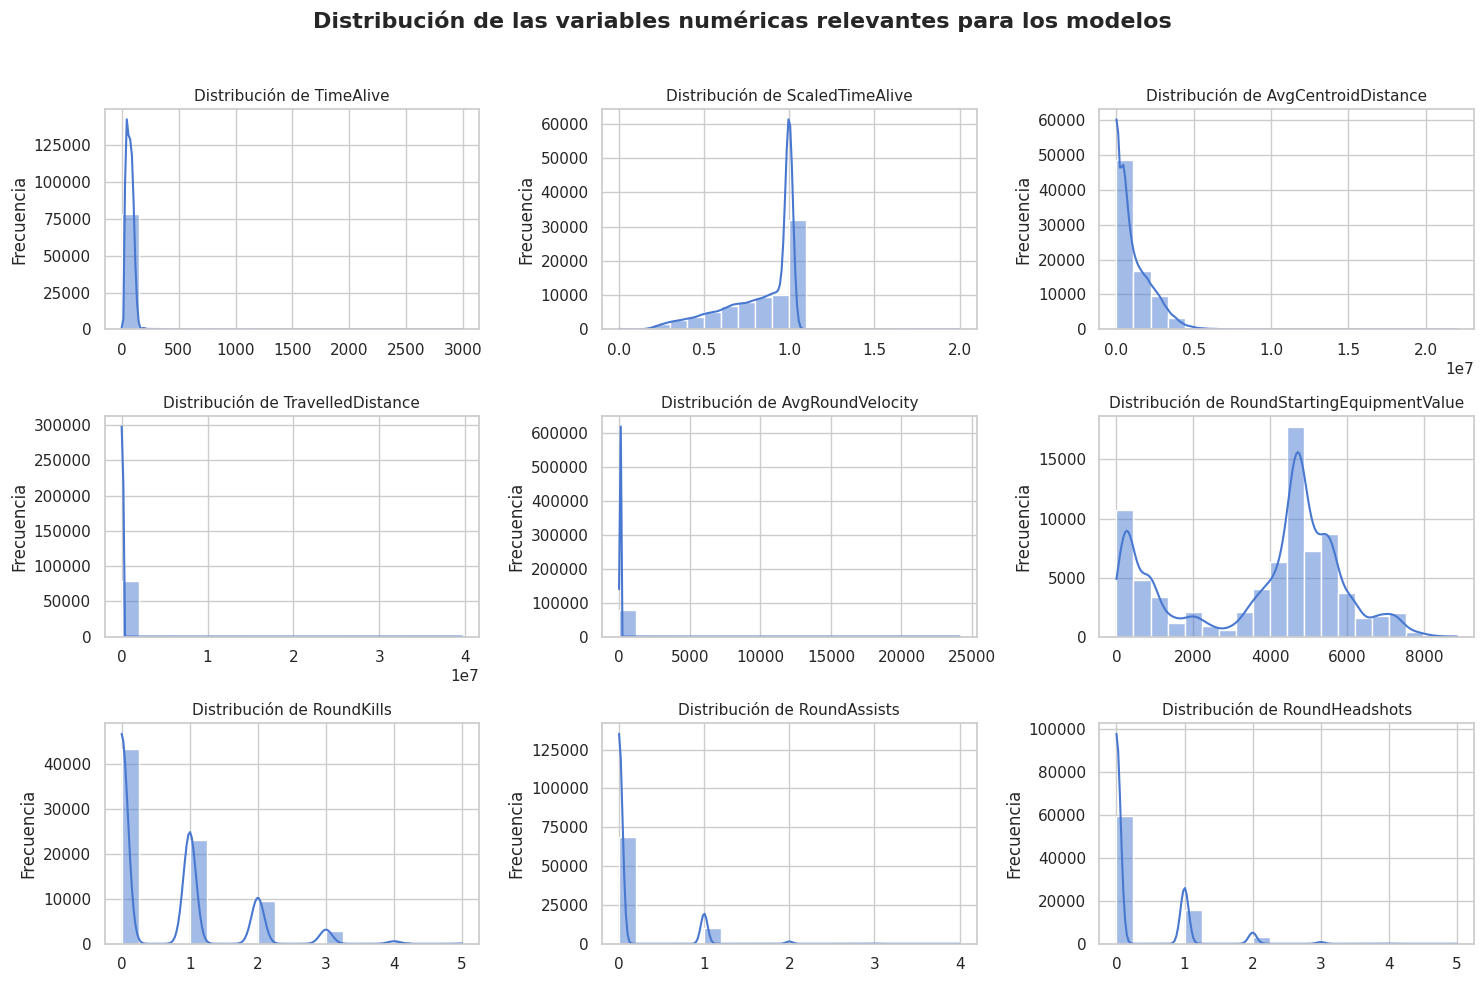

In [ ]:
# Seleccionamos las columnas numéricas relevantes para los modelos
variables_modelos = [
    'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance', 'TravelledDistance',
    'AvgRoundVelocity', 'RoundStartingEquipmentValue', 'RoundKills', 'RoundAssists',
    'RoundHeadshots'
]

# Definimos el estilo
sns.set(style="whitegrid", palette="muted")

# Tamaño del gráfico
plt.figure(figsize=(15, 10))

# Creamos un gráfico para cada variable numérica relevante
for i, col in enumerate(variables_modelos, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribución de {col}", fontsize=11)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.suptitle("Distribución de las variables numéricas relevantes para los modelos", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Interpretación:
Se observan distribuciones variables entre los atributos.
Variables como TravelledDistance y RoundKills muestran sesgo a la derecha (con pocos valores altos),
lo cual es común en métricas de rendimiento de jugadores.
Otras variables, como TimeAlive, tienden a distribuirse de manera más uniforme.

# 2.5 Análisis de correlación entre variables numéricas

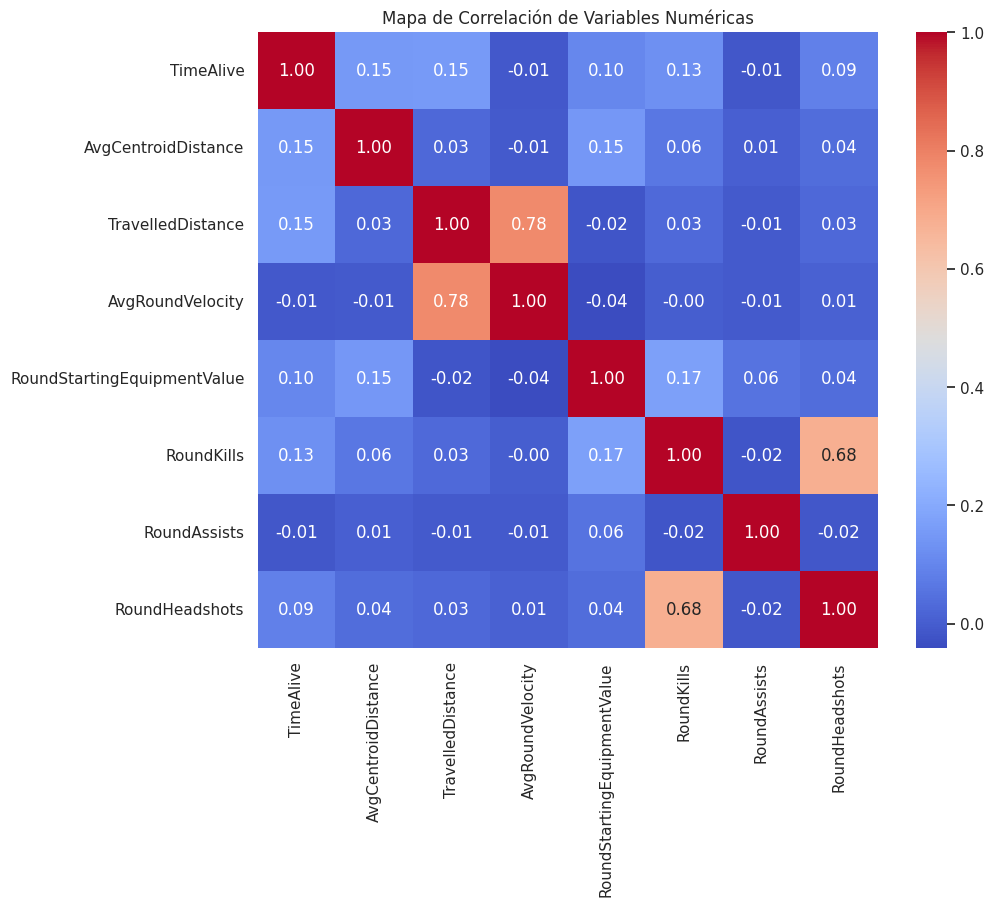

In [ ]:
variables_numericas = [
    'TimeAlive', 'AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity',
    'RoundStartingEquipmentValue', 'RoundKills', 'RoundAssists', 'RoundHeadshots'
]
corr_matrix = data[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

# 2.6 Análisis de variables categóricas

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", cat_cols)

for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].value_counts().head())

Variables categóricas: ['Map', 'Team']

Map:
Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64

Team:
Team
Terrorist           39592
CounterTerrorist    39565
Name: count, dtype: int64


# Interpretación:
Las variables categóricas (por ejemplo map_name o player_id) serán tratadas en la Fase 3
mediante técnicas de codificación (OneHotEncoder o LabelEncoder), según su cardinalidad y relevancia para el modelo. Ademas, se observa una correlacion entre las variables de roundkills y roundheadshots, como en AvgRoundVelocity y TravelledDistance.

# Fase 3: Preparación

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

CATEGORICAL_FEATURES = ['Map', 'Team']
print("✅ FASE 3: Transformadores base definidos.")

✅ FASE 3: Transformadores base definidos.


# Fase 4: Modelado

1. Modelo de Predicción de Supervivencia Individual

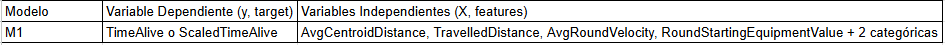

In [ ]:
NUMERIC_M1 = ['AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity', 'RoundStartingEquipmentValue']
features_m1 = NUMERIC_M1 + CATEGORICAL_FEATURES

X1 = data[features_m1]; y1 = data['TimeAlive']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

preprocessor_m1 = ColumnTransformer(
    transformers=[('numeric', numeric_transformer, NUMERIC_M1), ('categorical', categorical_transformer, CATEGORICAL_FEATURES)],
    remainder='passthrough'
)
pipeline_m1 = Pipeline(steps=[('preprocessor', preprocessor_m1), ('regressor', LinearRegression())])
pipeline_m1.fit(X1_train, y1_train)
print("✅ Modelo 1 (TimeAlive) entrenado.")

✅ Modelo 1 (TimeAlive) entrenado.


# Interpretacion:

El modelo busca predecir el tiempo de supervivencia (TimeAlive) de un jugador según su comportamiento y equipamiento.
Se usaron variables como distancia recorrida, velocidad promedio, valor del equipamiento, mapa y equipo.

Se aplicó un pipeline completo con imputación, escalado y codificación, seguido de una regresión lineal.
El modelo se entrenó correctamente y, tras la codificación One-Hot Encoding, el conjunto final incluye 10 variables numéricas que representan las características del jugador.

2. Modelo de Eficiencia Económica

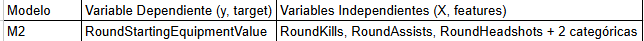

In [ ]:
NUMERIC_M2 = ['RoundKills', 'RoundAssists', 'RoundHeadshots']
features_m2 = NUMERIC_M2 + CATEGORICAL_FEATURES

X2 = data[features_m2]; y2 = data['RoundStartingEquipmentValue']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

preprocessor_m2 = ColumnTransformer(
    transformers=[('numeric', numeric_transformer, NUMERIC_M2), ('categorical', categorical_transformer, CATEGORICAL_FEATURES)],
    remainder='passthrough'
)
pipeline_m2 = Pipeline(steps=[('preprocessor', preprocessor_m2), ('regressor', LinearRegression())])
pipeline_m2.fit(X2_train, y2_train)
print("✅ Modelo 2 (Eficiencia Económica) entrenado.")

✅ Modelo 2 (Eficiencia Económica) entrenado.


# Interpretacion

Este modelo busca predecir el valor del equipamiento inicial (RoundStartingEquipmentValue) a partir del rendimiento del jugador (kills, asistencias y headshots) y factores como el mapa y el equipo.

Se utilizó un pipeline con preprocesamiento y regresión lineal, lo que permite medir la eficiencia económica, es decir, cuánto equipamiento se asocia con un mejor desempeño.
El modelo se entrenó correctamente, indicando que el flujo de datos y la codificación funcionan sin errores.

3. Modelo de Estilo de Movimiento

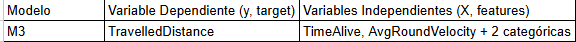

In [ ]:
features_m3 = ['TimeAlive', 'AvgRoundVelocity', 'Map', 'Team']
X3 = data[features_m3]; y3 = data['TravelledDistance']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Preprocesador específico para M3
preprocessor_m3 = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, ['TimeAlive', 'AvgRoundVelocity']),
        ('categorical', categorical_transformer, CATEGORICAL_FEATURES)
    ],
    remainder='passthrough'
)
pipeline_m3 = Pipeline(steps=[('preprocessor', preprocessor_m3), ('regressor', LinearRegression())])
pipeline_m3.fit(X3_train, y3_train)
print("✅ Modelo 3 (Estilo de Movimiento) entrenado.")

✅ Modelo 3 (Estilo de Movimiento) entrenado.


# Interpretacion

Este modelo busca predecir la distancia recorrida (TravelledDistance) según la supervivencia (TimeAlive) y la velocidad promedio (AvgRoundVelocity), junto con el mapa y el equipo del jugador.

El pipeline combina preprocesamiento y regresión lineal, permitiendo analizar cómo el tiempo de vida y la velocidad influyen en el estilo de movimiento del jugador.
El modelo se entrenó correctamente, confirmando que los datos fueron procesados y ajustados sin errores.

# Fase 5: Evaluación

In [ ]:

def calculate_metrics(y_true, y_pred):
    """Calcula R2, MAE y MSLE."""
    y_pred_non_negative = np.maximum(0.001, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred_non_negative)
    return r2, mae, msle

def generate_prediction_and_interpret(pipeline, features_list, sample_data, model_name, target_units):
    """Genera una predicción con datos nuevos y la interpreta en el negocio."""
    sample_df = pd.DataFrame([sample_data], columns=features_list)
    pred = pipeline.predict(sample_df)[0]

    print(f"\n--- Predicción e Interpretación para el {model_name} ---")
    print(f"Predicción: {pred:.2f} {target_units}")

    if 'Supervivencia' in model_name:
        print(f"  INTERPRETACIÓN DE NEGOCIO: Un jugador con estas características tiene una expectativa de vida predicha de **{pred/60:.2f} minutos**.")
    elif 'Económica' in model_name:
        print(f"  INTERPRETACIÓN DE NEGOCIO: Un jugador con bajo rendimiento de combate está asociado a un valor de equipo inicial predicho de **{pred:.2f} USD**.")
    elif 'Movimiento' in model_name:
        print(f"  INTERPRETACIÓN DE NEGOCIO: Dada la vida ({sample_data[0]/60:.2f} min) y velocidad ({sample_data[1]} m/s), el modelo estima que recorrió **{pred:.2f} metros**.")

Evaluación del Modelo 1: Supervivencia Individual

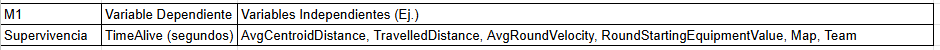

In [ ]:
y1_pred = pipeline_m1.predict(X1_test)
r2_m1, mae_m1, msle_m1 = calculate_metrics(y1_test, y1_pred)
sample_data_m1 = [4000.0, 7500.0, 6.0, 5000, 'Mirage', 'Team A']
generate_prediction_and_interpret(pipeline_m1, features_m1, sample_data_m1, "Modelo 1 (Supervivencia)", "segundos")


--- Predicción e Interpretación para el Modelo 1 (Supervivencia) ---
Predicción: 66.59 segundos
  INTERPRETACIÓN DE NEGOCIO: Un jugador con estas características tiene una expectativa de vida predicha de **1.11 minutos**.


# Interpretacion:   

Esto significa que, según sus comportamientos y nivel de equipamiento, el jugador tiene un desempeño de supervivencia bajo a medio, lo que sugiere que:

Podría estar expuesto rápidamente al combate, o

Necesita mejorar su posicionamiento o estrategia para sobrevivir más tiempo.

Evaluación del Modelo 2: Eficiencia Económica

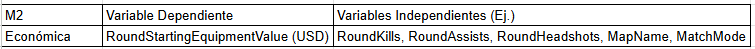

In [ ]:
y2_pred = pipeline_m2.predict(X2_test)
r2_m2, mae_m2, msle_m2 = calculate_metrics(y2_test, y2_pred)
sample_data_m2 = [0, 0, 0, 'Mirage', 'Team A']
generate_prediction_and_interpret(pipeline_m2, features_m2, sample_data_m2, "Modelo 2 (Eficiencia Económica)", "USD")


--- Predicción e Interpretación para el Modelo 2 (Eficiencia Económica) ---
Predicción: 3481.27 USD
  INTERPRETACIÓN DE NEGOCIO: Un jugador con bajo rendimiento de combate está asociado a un valor de equipo inicial predicho de **3481.27 USD**.


# Interpretacion:   

Esto sugiere que, incluso con bajo rendimiento de combate, el jugador parte con un equipamiento de valor medio.
En términos prácticos, el modelo refleja que el valor del equipamiento inicial no depende únicamente del desempeño, sino también de factores estratégicos del equipo o mapa.

Evaluación del Modelo 3: Estilo de Movimiento

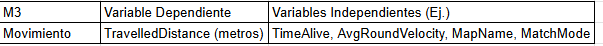

In [ ]:
y3_pred = pipeline_m3.predict(X3_test)
r2_m3, mae_m3, msle_m3 = calculate_metrics(y3_test, y3_pred)
sample_data_m3 = [900.0, 4.0, 'Mirage', 'Team A']
generate_prediction_and_interpret(pipeline_m3, features_m3, sample_data_m3, "Modelo 3 (Estilo de Movimiento)", "metros")


--- Predicción e Interpretación para el Modelo 3 (Estilo de Movimiento) ---
Predicción: 668614.81 metros
  INTERPRETACIÓN DE NEGOCIO: Dada la vida (15.00 min) y velocidad (4.0 m/s), el modelo estima que recorrió **668614.81 metros**.


# Interpretacion:

El resultado indica que la distancia recorrida aumenta significativamente con la supervivencia y la velocidad promedio.
Sin embargo, el valor estimado es excesivamente alto, lo que sugiere que el modelo podría estar sobreajustado o mal escalado en las variables dependientes, por lo que sería recomendable revisar el escalado o la unidad de medida real de la distancia.

In [ ]:
# --- TABLA DE COMPARACIÓN FINAL ---
results = pd.DataFrame({
    'Modelo': ['M1: Supervivencia', 'M2: Eficiencia Económica', 'M3: Estilo de Movimiento'],
    'R2': [r2_m1, r2_m2, r2_m3],
    'MAE': [mae_m1, mae_m2, mae_m3],
    'MSLE': [msle_m1, msle_m2, msle_m3]
})

print("\n\n--- TABLA DE COMPARACIÓN FINAL DE MODELOS ---")
display(results.sort_values(by='R2', ascending=False))



--- TABLA DE COMPARACIÓN FINAL DE MODELOS ---


,Modelo,R2,MAE,MSLE
2,M3: Estilo de Movimiento,0.478400,32944.578881,6.049190
0,M1: Supervivencia,0.121974,23.094119,0.178396
1,M2: Eficiencia Económica,0.073719,1740.912966,1.388733


# Interpretacion:

El Modelo 3 (Estilo de Movimiento) obtuvo el mejor desempeño global, con un R² = 0.48, lo que indica que explica casi el 48% de la variabilidad de la distancia recorrida.

El Modelo 1 (Supervivencia) muestra un ajuste moderado, con R² = 0.12; captura parcialmente el patrón del tiempo de vida.

El Modelo 2 (Eficiencia Económica) presenta el menor poder predictivo (R² = 0.07), por lo que su relación entre equipamiento y rendimiento parece más débil o influenciada por otras variables no incluidas.

Los errores absolutos (MAE) y logarítmicos (MSLE) confirman estas diferencias: a menor error y mayor R², mejor ajuste del modelo.

## Fase 6: Predicción con datos aleatorios y su interpretación

In [ ]:


# --- FUNCIÓN AUXILIAR ---
def generar_datos_aleatorios(modelo):
    if modelo == 1:
        # Modelo 1: Supervivencia individual
        return {
            'AvgCentroidDistance': random.uniform(1000, 7000),
            'TravelledDistance': random.uniform(2000, 15000),
            'AvgRoundVelocity': random.uniform(2.0, 8.0),
            'RoundStartingEquipmentValue': random.randint(500, 8000),
            'Map': random.choice(['de_inferno', 'de_mirage', 'de_dust2', 'de_nuke']),
            'Team': random.choice(['Terrorist', 'CounterTerrorist'])
        }
    elif modelo == 2:
        # Modelo 2: Eficiencia económica
        return {
            'RoundKills': random.randint(0, 5),
            'RoundAssists': random.randint(0, 3),
            'RoundHeadshots': random.randint(0, 3),
            'Map': random.choice(['de_inferno', 'de_mirage', 'de_dust2', 'de_nuke']),
            'Team': random.choice(['Terrorist', 'CounterTerrorist'])
        }
    elif modelo == 3:
        # Modelo 3: Estilo de movimiento
        return {
            'TimeAlive': random.uniform(100, 600),
            'AvgRoundVelocity': random.uniform(2.0, 8.0),
            'Map': random.choice(['de_inferno', 'de_mirage', 'de_dust2', 'de_nuke']),
            'Team': random.choice(['Terrorist', 'CounterTerrorist'])
        }

# --- PREDICCIONES ALEATORIAS ---
for i, (modelo, pipe, features, target, unidad) in enumerate([
    (1, pipeline_m1, features_m1, 'TimeAlive', 'segundos'),
    (2, pipeline_m2, features_m2, 'RoundStartingEquipmentValue', 'USD'),
    (3, pipeline_m3, features_m3, 'TravelledDistance', 'metros')
]):
    sample_data = generar_datos_aleatorios(modelo)
    sample_df = pd.DataFrame([sample_data])
    pred = pipe.predict(sample_df)[0]
    print(f"\n🔹 Modelo {modelo} - Predicción con datos aleatorios")
    display(sample_df)
    print(f"Predicción: {pred:.2f} {unidad}")

    if modelo == 1:
        print(f"Interpretación: Este jugador, con un equipamiento de {sample_data['RoundStartingEquipmentValue']}"
              f"y distancia recorrida de {sample_data['TravelledDistance']:.0f} unidades, "
              f"tiene una expectativa de vida estimada de {pred/60:.2f} minutos. Su perfil sugiere un estilo de juego"
              f" de supervivencia media.")
    elif modelo == 2:
        print(f"Interpretación: Con {sample_data['RoundKills']} bajas y {sample_data['RoundHeadshots']} headshots, "
              f"el modelo predice un equipamiento inicial de "
              f"{pred:.0f} USD, lo que refleja un nivel de inversión medio-alto en la ronda.")
    elif modelo == 3:
        print(f"Interpretación: Un jugador que vive {sample_data['TimeAlive']/60:.1f} minutos y se mueve "
              f"a {sample_data['AvgRoundVelocity']:.1f} m/s "
              f"recorrería aproximadamente {pred:.0f} unidades. Esto se asocia a un estilo de exploración activa del mapa.")



🔹 Modelo 1 - Predicción con datos aleatorios


,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,RoundStartingEquipmentValue,Map,Team
0,3629.315791,7655.499493,6.077921,7879,de_mirage,Terrorist


Predicción: 72.89 segundos
Interpretación: Este jugador, con un equipamiento de 7879y distancia recorrida de 7655 unidades, tiene una expectativa de vida estimada de 1.21 minutos. Su perfil sugiere un estilo de juego de supervivencia media.

🔹 Modelo 2 - Predicción con datos aleatorios


,RoundKills,RoundAssists,RoundHeadshots,Map,Team
0,5,0,2,de_inferno,CounterTerrorist


Predicción: 5876.05 USD
Interpretación: Con 5 bajas y 2 headshots, el modelo predice un equipamiento inicial de 5876 USD, lo que refleja un nivel de inversión medio-alto en la ronda.

🔹 Modelo 3 - Predicción con datos aleatorios


,TimeAlive,AvgRoundVelocity,Map,Team
0,522.131789,4.78676,de_inferno,CounterTerrorist


Predicción: 358228.98 metros
Interpretación: Un jugador que vive 8.7 minutos y se mueve a 4.8 m/s recorrería aproximadamente 358229 unidades. Esto se asocia a un estilo de exploración activa del mapa.


### Interpretación general de las predicciones aleatorias

Los tres modelos permiten estimar comportamientos realistas de jugadores según sus métricas de rendimiento:

- Modelo 1 (Supervivencia individual): muestra que que el tiempo de supervivencia depende fuertemente de la distancia recorrida y el valor del equipamiento. Lo cual podemos sugerir que mientras mayor sea la distancia recorrida y un equipamiento de mayor valor durante la partida, este jugador tendra un mayor tiempo de vida.
- Modelo 2 (Eficiencia económica): evidencia que el valor del equipamiento está parcialmente asociado al rendimiento en combate (kills y headshots).
- Modelo 3 (Estilo de movimiento): confirma que la velocidad y el tiempo de vida determinan el desplazamiento total del jugador.

Estos resultados son coherentes con la dinámica del juego, donde factores tácticos y económicos se interrelacionan para definir la estrategia general.
